# Machine Learning Applications for Accelerators

## Exercise 1
Build a Gaussian Process to model    
$f(x) = sin(x)$
              . 
For this first exercise, build the GP with only numpy and scipy (i.e. do not use scikit-learn, BoTorch,...).     
 
Choose a prior with any kernel and $μ(x) = 0 $ define a method to compute the posterior and plot the posterior and the true function with 5 test points.   
Tipp:   
    - e.g. RBF kernel   
    - covariance matrix element $`Kij = kRBF(xi, xj) `$ build entire matrix.  
 
 



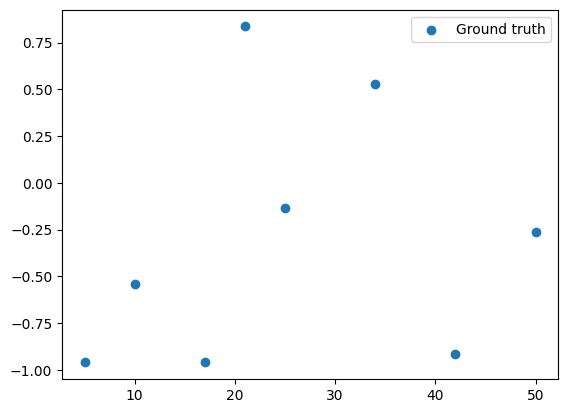

In [49]:
from math import sin 
import matplotlib.pyplot as plt

# Generate 5 test points for ground truth and plot 
x_train = [5, 10, 17, 21, 25, 34, 42, 50]
#x_train = [0,1,2,3,4]
y_train = [sin(x) for x in x_train]

plt.scatter(x_train, y_train, label='Ground truth')
plt.legend()
plt.show()

In [50]:
import numpy as np
def rbf_kernel(x1, x2, length_scale=50.0):
    sqdist = np.subtract.outer(x1, x2) ** 2
    return np.exp(-0.5 * sqdist / length_scale**2)

K_train_train = rbf_kernel(x_train, x_train)


minn, maxx = min(x_train), max(x_train)
test_amount = 20*(maxx-minn)
x_test = np.linspace(minn, maxx, test_amount)

y_true_vals = [sin(el) for el in x_test]

K_test_train = rbf_kernel(x_test, x_train)
K_train_test = np.transpose( K_test_train)

K_test_test = rbf_kernel(x_test, x_test)

def mean(K_test_train, K_train_train, y_train):
    return K_test_train @ np.linalg.inv(K_train_train) @ y_train

def variance(K_test_test, K_test_train, K_train_train, K_train_test):
    return np.subtract(K_test_test, (K_test_train @ np.linalg.inv(K_train_train) @ K_train_test))


In [51]:
from math import pi, e 

def gaussian(x, mu, sigma):
    denom = (2*pi*sigma*sigma)**0.5
    exp = -((x-mu)**2/(2*sigma*sigma))
    return e**exp/denom

meann = mean(K_test_train, K_train_train, y_train)
variancee_mat = variance(K_test_test, K_test_train, K_train_train, K_train_test)

meann = np.array(meann)
variancee_mat = np.array(variancee_mat)

variancee = np.diag(variancee_mat)

print(meann.shape, "\n", variancee.shape)


y_test = gaussian(x_test, meann, variancee)

# plt.plot(x_test, y_test, color = "blue")
# plt.scatter(x_train, y_train, color="orange")
# plt.show()

(900,) 
 (900,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17584\2475705336.py:2: RuntimeWarning: invalid value encountered in sqrt
  std_pred = np.sqrt(var_pred)  # Standard deviation is the square root of the variance


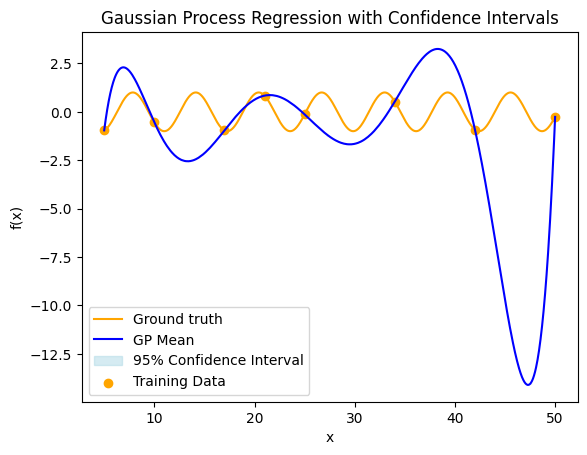

In [52]:
def plot_gp_with_confidence(x_train, y_train, x_test, mean_pred, var_pred, confidence=1.96):
    std_pred = np.sqrt(var_pred)  # Standard deviation is the square root of the variance

    # Plot the mean prediction
    plt.plot(x_test, y_true_vals, color='orange', label='Ground truth')
    plt.plot(x_test, mean_pred, color="blue", label="GP Mean")

    # Plot the confidence interval
    plt.fill_between(x_test, 
                     mean_pred - confidence * std_pred, 
                     mean_pred + confidence * std_pred, 
                     color="lightblue", alpha=0.5, label="95% Confidence Interval")
    
    # Plot the original data points
    plt.scatter(x_train, y_train, color="orange", label="Training Data")
    
    # Add labels and legend
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gaussian Process Regression with Confidence Intervals")
    plt.legend()
    plt.show()

plot_gp_with_confidence(x_train, y_train, x_test, meann, variancee)

**Note**: Using a periodic kernel could yield much better results for crazy values of x (not nice small values within one periode)